# PCA Analysis

## Screening Data

In [ ]:
# import Python packages
import pandas as pd
import numpy as np
np.random.seed(1990)
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import metrics

# Functions used to preprocess the data
from sklearn import preprocessing

# Functions used for Hierarchical Clustering
from scipy.cluster import hierarchy

# Functions used for K-Means
from sklearn import cluster

# Functions used for chi-squared test
from scipy.stats import chi2_contingency

In [ ]:
# import the data
uploaded = files.upload()
attitude = pd.read_excel('Ford Ka Data.xlsx', sheet_name='Demographic Data', header = 6) 

Saving Ford Ka Data.xlsx to Ford Ka Data.xlsx


In [ ]:
attitude.head()

,Respondent Number,Preference Group,Gender,Age,Marital Status,Number of Children,1st Time Purchase,Age Category,Children Category,Income Category,Unnamed: 10,行标签,1,2,总计
0,1,1,2,44,3,0,2,5,0,6,NaN,1,54.0,62.0,116.0
1,2,3,1,24,2,1,1,1,1,3,NaN,2,36.0,36.0,72.0
2,3,2,2,34,3,1,2,3,1,1,NaN,3,40.0,22.0,62.0
3,4,3,1,44,3,0,2,5,0,3,NaN,总计,130.0,120.0,250.0
4,5,1,2,41,1,2,1,5,2,4,NaN,NaN,NaN,NaN,NaN


In [ ]:
tab = pd.crosstab(index=attitude['Preference Group'], columns=attitude['Gender'], margins=True)
tab.div(tab.loc['All'], axis=1)

Gender,1,2,All
Preference Group,,,
1,0.415385,0.516667,0.464
2,0.276923,0.300000,0.288
3,0.307692,0.183333,0.248
All,1.000000,1.000000,1.000


In [ ]:
tab = pd.crosstab(index=attitude['Preference Group'], columns=attitude['Marital Status'], margins=True)
tab.div(tab.loc['All'], axis=1)

Marital Status,1,2,3,All
Preference Group,,,,
1,0.519685,0.500000,0.378947,0.464
2,0.267717,0.214286,0.336842,0.288
3,0.212598,0.285714,0.284211,0.248
All,1.000000,1.000000,1.000000,1.000


In [ ]:
tab = pd.crosstab(index=attitude['Preference Group'], columns=attitude['Children Category'], margins=True)
tab.div(tab.loc['All'], axis=1)

Children Category,0,1,2,All
Preference Group,,,,
1,0.418919,0.604167,0.462963,0.464
2,0.304054,0.250000,0.277778,0.288
3,0.277027,0.145833,0.259259,0.248
All,1.000000,1.000000,1.000000,1.000


In [ ]:
tab = pd.crosstab(index=attitude['Preference Group'], columns=attitude['Age Category'], margins=True)
tab.div(tab.loc['All'], axis=1)

Age Category,1,2,3,4,5,6,All
Preference Group,,,,,,,
1,0.416667,0.418605,0.489362,0.354839,0.571429,0.428571,0.464
2,0.125000,0.302326,0.255319,0.354839,0.238095,0.428571,0.288
3,0.458333,0.279070,0.255319,0.290323,0.190476,0.142857,0.248
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000


In [ ]:
tab = pd.crosstab(index=attitude['Preference Group'], columns=attitude['Income Category'], margins=True)
tab.div(tab.loc['All'], axis=1)

Income Category,1,2,3,4,5,6,All
Preference Group,,,,,,,
1,0.478261,0.413043,0.391304,0.413043,0.549020,0.552632,0.464
2,0.217391,0.326087,0.347826,0.347826,0.235294,0.210526,0.288
3,0.304348,0.260870,0.260870,0.239130,0.215686,0.236842,0.248
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000


## Factor Analysis

### Load Packages and Library

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 450 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 6.6 MB/s 
     |████████████████████████████████| 8.8 MB 1.5 MB/s 
     |████████████████████████████████| 98 kB 5.9 MB/s 
     |████████████████████████████████| 468 kB 34.4 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=733910be6a8712fa78e6e5ce00b3891bd87308521b96176baba11c3ac39041f6
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [ ]:
# import Python packages
import pandas as pd
import numpy as np
from google.colab import files
from sklearn import preprocessing
import matplotlib.pyplot as plt

# regression package
import statsmodels.api as sm

# factor analysis packages
import factor_analyzer
# you could also use sklearn to run PCA

# clustering packages
from sklearn import cluster
from sklearn.cluster import KMeans
# k_means() is a wrapper that returns the result of KMeans.fit()
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# import the data
uploaded = files.upload()
attitude = pd.read_excel('Ford Ka Data.xlsx', sheet_name='Psychographic Data', header = 6) 

Saving Ford Ka Data.xlsx to Ford Ka Data.xlsx


In [ ]:
attitude.head()

,Respondent Number,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,1,6,2,4,3,1,5,5,3,4,...,2,4,5,4,5,3,4,4,4,2
1,2,7,7,7,5,4,4,5,4,5,...,1,1,1,1,5,4,3,5,4,5
2,3,5,4,6,5,7,5,3,5,4,...,3,5,6,3,4,4,5,3,4,4
3,4,4,2,5,4,2,4,5,4,3,...,3,5,4,4,4,2,5,5,5,3
4,5,5,5,7,6,7,3,4,5,4,...,6,4,5,5,4,5,4,3,4,5


In [ ]:
attitude = attitude.iloc[:,1:]
attitude.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,6,2,4,3,1,5,5,3,4,4,...,2,4,5,4,5,3,4,4,4,2
1,7,7,7,5,4,4,5,4,5,5,...,1,1,1,1,5,4,3,5,4,5
2,5,4,6,5,7,5,3,5,4,5,...,3,5,6,3,4,4,5,3,4,4
3,4,2,5,4,2,4,5,4,3,4,...,3,5,4,4,4,2,5,5,5,3
4,5,5,7,6,7,3,4,5,4,2,...,6,4,5,5,4,5,4,3,4,5


In [ ]:
df_sc = pd.DataFrame(preprocessing.scale(attitude),columns=attitude.columns)
df_sc.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,0.586596,-1.050091,-0.345145,-0.760086,-1.555356,0.969977,1.161636,-0.921106,0.087974,0.081246,...,-0.885224,0.572822,1.250611,0.564487,0.508674,-1.046641,-0.253490,0.165933,0.247950,-1.288284
1,1.238370,1.498674,1.986917,0.469827,0.083011,0.007698,1.161636,0.084468,1.004371,1.048460,...,-1.433012,-1.472971,-1.433104,-1.423142,0.508674,-0.290398,-1.045645,0.893708,0.247950,1.023230
2,-0.065177,-0.030585,1.209563,0.469827,1.721378,0.969977,-0.912714,1.090043,0.087974,1.048460,...,-0.337437,1.254753,1.921540,-0.098056,-0.235001,-0.290398,0.538666,-0.561842,0.247950,0.252726
3,-0.716951,-1.050091,0.432209,-0.145130,-1.009234,0.007698,1.161636,0.084468,-0.828423,0.081246,...,-0.337437,1.254753,0.579683,0.564487,-0.235001,-1.802885,0.538666,0.893708,1.022795,-0.517779
4,-0.065177,0.479168,1.986917,1.084783,1.721378,-0.954581,0.124461,1.090043,0.087974,-1.853182,...,1.305925,0.572822,1.250611,1.227029,-0.235001,0.465846,-0.253490,-0.561842,0.247950,1.023230


### Step 1: No Rotation

In [ ]:
ka_pca = factor_analyzer.FactorAnalyzer(n_factors=df_sc.shape[1],
                                          rotation=None,
                                          method='principal').fit(df_sc)
ka_pca

FactorAnalyzer(method='principal', n_factors=62, rotation=None,
               rotation_kwargs={})

### Step 2: Choose Number of Factors

In [ ]:
def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squares Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

get_summary(ka_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
Sum of Squares Loadings,16.60,10.78,5.79,1.47,1.28,1.21,1.17,1.12,1.01,0.98,0.90,0.85,0.82,0.79,0.76,0.74,0.72,0.70,0.64,0.64,0.61,0.60,0.58,0.55,0.54,0.52,0.50,0.49,0.46,0.46,0.42,0.41,0.40,0.39,0.38,0.36,0.34,0.33,0.32,0.32,0.30,0.29,0.28,0.26,0.26,0.23,0.23,0.22,0.21,0.20,0.19,0.18,0.16,0.15,0.15,0.14,0.12,0.12,0.11,0.09,0.08,0.08
Proportion of Variance Explained,0.27,0.17,0.09,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cumulative Proportion,0.27,0.44,0.54,0.56,0.58,0.60,0.62,0.64,0.65,0.67,0.68,0.70,0.71,0.72,0.73,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.84,0.85,0.86,0.87,0.88,0.88,0.89,0.90,0.90,0.91,0.91,0.92,0.92,0.93,0.93,0.94,0.94,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97,0.98,0.98,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00


Text(0, 0.5, 'Variance')

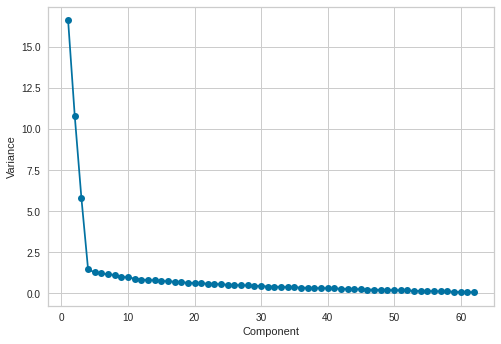

In [ ]:
# scree plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(ka_pca.get_factor_variance()[0])),
         ka_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

### Step 3: PCA - Varimax Rotation (With 4 Factors)

In [ ]:
ka_pca_rotated = factor_analyzer.FactorAnalyzer(n_factors=4,
                                          rotation='varimax',
                                          method='principal').fit(df_sc)

In [ ]:
def get_loadings_communalities(pca,round_dig=2,index_names=None):
  '''Returns a DataFrame containings the loadings'''
  df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
  if pca.rotation:
    df['communalities']=pca.get_communalities()
  df=df.round(3)
  return  df

data = get_loadings_communalities(ka_pca_rotated)
data

,RC1,RC2,RC3,RC4,communalities
q1,0.645,-0.324,0.395,0.023,0.677
q2,0.911,0.025,0.043,-0.051,0.834
q3,-0.121,0.686,-0.094,0.054,0.497
q4,-0.011,0.645,-0.548,-0.008,0.716
q5,0.348,0.750,0.232,0.032,0.738
...,...,...,...,...,...
q58,-0.071,-0.112,0.656,-0.102,0.459
q59,-0.065,-0.223,0.632,-0.069,0.458
q60,0.075,0.045,-0.680,0.143,0.491
q61,0.240,0.119,-0.679,0.068,0.537


In [ ]:
print(data.to_string())

       RC1    RC2    RC3    RC4  communalities
q1   0.645 -0.324  0.395  0.023          0.677
q2   0.911  0.025  0.043 -0.051          0.834
q3  -0.121  0.686 -0.094  0.054          0.497
q4  -0.011  0.645 -0.548 -0.008          0.716
q5   0.348  0.750  0.232  0.032          0.738
q6  -0.000 -0.013  0.096 -0.189          0.045
q7   0.075 -0.051 -0.128  0.483          0.258
q8  -0.102  0.133 -0.041 -0.032          0.031
q9   0.085 -0.069 -0.082 -0.185          0.053
q10  0.106 -0.066 -0.024  0.582          0.355
q11  0.047 -0.041 -0.042 -0.240          0.063
q12 -0.038  0.003 -0.060  0.585          0.347
q13 -0.015  0.072 -0.003  0.496          0.251
q14 -0.884 -0.136  0.277  0.000          0.877
q15 -0.624 -0.407  0.262 -0.090          0.632
q16 -0.509 -0.330 -0.375  0.039          0.510
q17 -0.366 -0.806  0.194 -0.013          0.821
q18 -0.541 -0.298 -0.362 -0.020          0.513
q19 -0.544 -0.297 -0.289 -0.094          0.477
q20 -0.892 -0.042 -0.061 -0.011          0.801
q21 -0.634 -0

RC 1: stylish, do not care about money

RC 2: trendy, performancy is not important

RC 3: freedon, do not care about nationality

RC 4: reliable, economic

## Question 5-6: Cluster Analysis

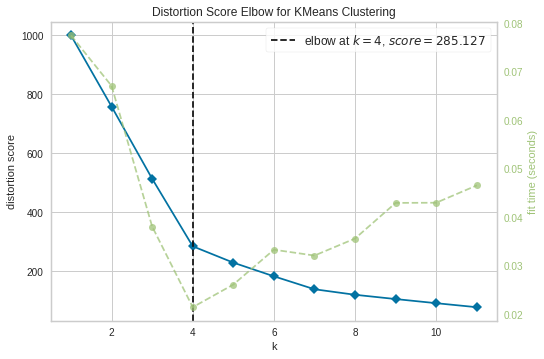

In [ ]:
ka_scores = pd.DataFrame(ka_pca_rotated.transform(df_sc),
      columns=[f'RC{i}' for i in range(1,1+ka_pca_rotated.loadings_.shape[1])])
model = KMeans(random_state=1690)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(ka_scores)
visualizer.show()

In [ ]:
def check_clusters(data,labels):
  print(list(zip(*np.unique(labels,return_counts=True))))
  # pivot_table() calculates the mean by default
  return pd.pivot_table(data,index=labels)

In [ ]:
centroids_km, labels_km, inertia_km = cluster.k_means(ka_scores,n_clusters=4,random_state=1690)
check_clusters(ka_scores,labels_km)

[(0, 65), (1, 75), (2, 32), (3, 78)]


,RC1,RC2,RC3,RC4
0,-0.202578,1.642389,-0.047653,0.061246
1,-1.087387,-0.749447,-0.687052,0.054253
2,-0.389095,-0.534533,2.418080,-0.128055
3,1.374008,-0.428740,-0.291695,-0.050670


Group 1: high positive SE on RC2, they want a trendy car 

Group 2: high negative SE on RC1, care about money, do not like stylish cars 

Group 3: high positive SE on RC3, they want a car representing freedom and do not care about the car’s nationalities 

Group 4: high positive SE on RC1, they like stylish cars and do not care about money

In [ ]:
labels_km

array([1, 3, 0, 1, 0, 3, 3, 3, 2, 1, 3, 0, 2, 1, 3, 1, 3, 1, 3, 2, 0, 0,
       3, 0, 0, 2, 0, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 0, 3, 1, 3, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 3, 0, 1, 1, 3, 1, 2, 0,
       3, 3, 1, 3, 3, 1, 2, 0, 3, 1, 1, 0, 1, 1, 3, 0, 3, 3, 0, 3, 1, 3,
       2, 0, 1, 2, 0, 1, 0, 3, 1, 1, 3, 2, 0, 0, 0, 3, 2, 3, 1, 0, 3, 3,
       0, 2, 1, 3, 3, 0, 1, 3, 3, 3, 3, 1, 3, 0, 2, 0, 1, 3, 1, 0, 0, 2,
       3, 2, 1, 3, 0, 1, 0, 1, 1, 3, 1, 1, 2, 0, 2, 3, 3, 3, 3, 1, 3, 3,
       3, 2, 3, 3, 1, 1, 1, 0, 3, 3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 3, 0, 3,
       1, 1, 0, 0, 2, 1, 0, 2, 0, 3, 0, 0, 1, 1, 0, 0, 3, 3, 0, 0, 2, 1,
       1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 3, 1, 3, 2, 1, 1, 0, 3, 1, 1, 3,
       0, 3, 0, 3, 3, 3, 3, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 3, 3, 2, 1, 3,
       0, 1, 3, 3, 0, 2, 0, 3], dtype=int32)

In [ ]:
uploaded = files.upload()
demograph = pd.read_excel('Ford Ka Data.xlsx', sheet_name='Demographic Data', header = 6)
demograph.head()

Saving Ford Ka Data.xlsx to Ford Ka Data (1).xlsx


,Respondent Number,Preference Group,Gender,Age,Marital Status,Number of Children,1st Time Purchase,Age Category,Children Category,Income Category
0,1,1,2,44,3,0,2,5,0,6
1,2,3,1,24,2,1,1,1,1,3
2,3,2,2,34,3,1,2,3,1,1
3,4,3,1,44,3,0,2,5,0,3
4,5,1,2,41,1,2,1,5,2,4


In [ ]:
demograph['cluster'] = labels_km
demograph.head()

,Respondent Number,Preference Group,Gender,Age,Marital Status,Number of Children,1st Time Purchase,Age Category,Children Category,Income Category,cluster
0,1,1,2,44,3,0,2,5,0,6,1
1,2,3,1,24,2,1,1,1,1,3,3
2,3,2,2,34,3,1,2,3,1,1,0
3,4,3,1,44,3,0,2,5,0,3,1
4,5,1,2,41,1,2,1,5,2,4,0


In [ ]:
df = demograph.groupby(['cluster', 'Preference Group'])['Preference Group'].count() # cluster with index 2 and 3 are Ka-Choosers
df

cluster  Preference Group
0        1                   29
         2                   32
         3                    4
1        1                   35
         2                   23
         3                   17
2        1                   18
         2                    4
         3                   10
3        1                   34
         2                   13
         3                   31
Name: Preference Group, dtype: int64

In [ ]:
df = demograph.groupby(['cluster', 'Gender'])['Gender'].count()
df

cluster  Gender
0        1         25
         2         40
1        1         43
         2         32
2        1         16
         2         16
3        1         46
         2         32
Name: Gender, dtype: int64

In [ ]:
df = demograph.groupby(['cluster', 'Age Category'])['Age Category'].count()
df

cluster  Age Category
0        1                6
         2                8
         3               14
         4                3
         5               22
         6               12
1        1                8
         2               13
         3               18
         4               10
         5               15
         6               11
2        1                4
         2                7
         3                4
         4                4
         5               10
         6                3
3        1                6
         2               15
         3               11
         4               14
         5               16
         6               16
Name: Age Category, dtype: int64

In [ ]:
df = demograph.groupby(['cluster', 'Children Category'])['Children Category'].count() # no children
df

cluster  Children Category
0        0                    38
         1                     8
         2                    19
1        0                    47
         1                    14
         2                    14
2        0                    16
         1                     8
         2                     8
3        0                    47
         1                    18
         2                    13
Name: Children Category, dtype: int64

In [ ]:
df = demograph.groupby(['cluster', 'Income Category'])['Income Category'].count() # relative higher income
df

cluster  Income Category
0        1                   7
         2                  15
         3                  16
         4                  12
         5                  10
         6                   5
1        1                   6
         2                   9
         3                  14
         4                  13
         5                  18
         6                  15
2        1                   5
         2                   7
         3                   3
         4                   5
         5                   5
         6                   7
3        1                   5
         2                  15
         3                  13
         4                  16
         5                  18
         6                  11
Name: Income Category, dtype: int64

In [ ]:
df = demograph.groupby(['cluster', 'Marital Status'])['Marital Status'].count() # married
df

cluster  Marital Status
0        1                 33
         2                  6
         3                 26
1        1                 35
         2                 11
         3                 29
2        1                 17
         2                  3
         3                 12
3        1                 42
         2                  8
         3                 28
Name: Marital Status, dtype: int64

In [ ]:
df = demograph.groupby(['cluster', '1st Time Purchase'])['1st Time Purchase'].count() # not first car
df

cluster  1st Time Purchase
0        1                     9
         2                    56
1        1                    14
         2                    61
2        1                     4
         2                    28
3        1                    10
         2                    68
Name: 1st Time Purchase, dtype: int64